In [393]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets.samples_generator import make_blobs

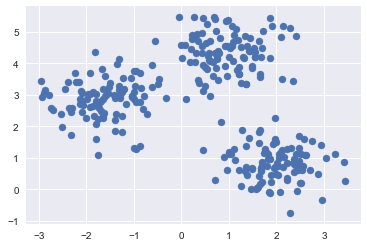

In [394]:
X, y_true = make_blobs(n_samples=300, centers=3,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);
plt.show()

In [395]:
def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState()
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    return centers, labels

centers, labels = find_clusters(X, 10)

In [396]:
from sklearn.metrics.pairwise import euclidean_distances
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

def find_quality(X, labels, centers):
    quality = 0
    sse = 0
    for current_label in np.unique(labels):
        current_cluster = X[labels == current_label]     
        sum_dist = 0
        for cluster_entry in current_cluster:
            sum_dist = sum_dist + euclidean_distances([cluster_entry], [centers[current_label]])
            sse = sse + euclidean_distances([cluster_entry], [centers[current_label]])**2
        quality = quality + (sum_dist / len(current_cluster))
    return quality,sse

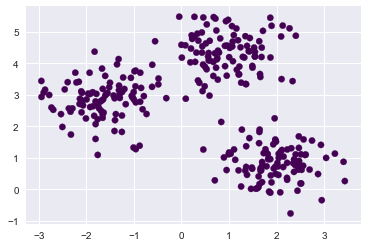

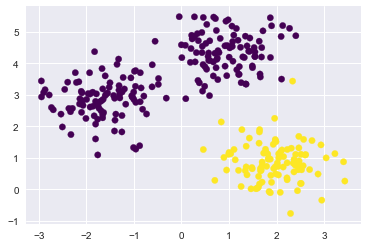

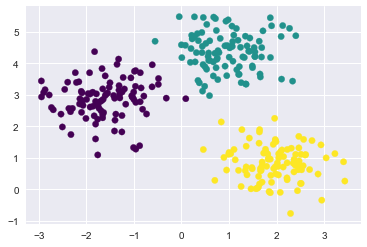

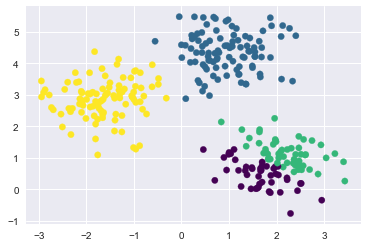

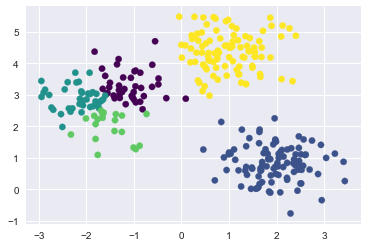

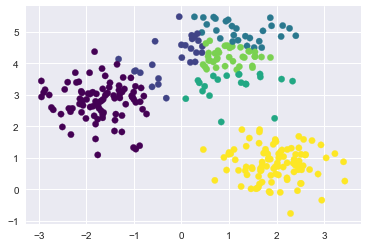

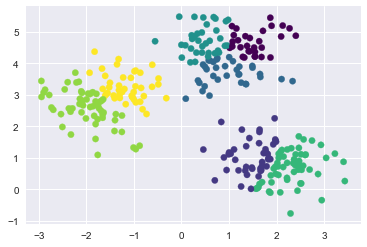

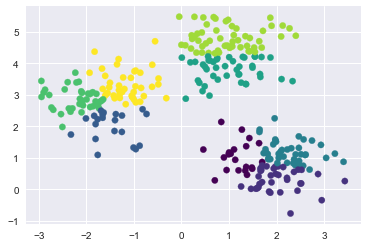

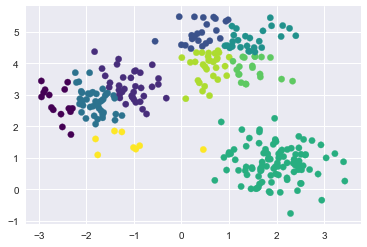

In [397]:
quality = []
sse = []
plt.clf()
for k in range(1,10):
    centers, labels = find_clusters(X, k)
    plt.scatter(X[:, 0], X[:, 1], c=labels,
                s=40, cmap='viridis');
    plt.show()
    _quality, _sse = find_quality(X, labels, centers)
    quality.append(np.ravel(_quality))
    sse.append(np.ravel(_sse))
#     print "K = " , k, " : Quality = ", _quality, " : SSE = ", _sse

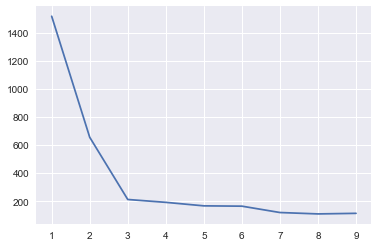

In [398]:
plt.clf()
plt.plot(list(range(1,10)),sse)
plt.show()

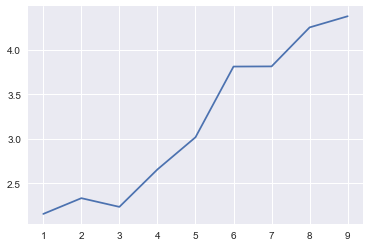

In [399]:
plt.clf()
plt.plot(list(range(1,10)),quality)
plt.show()

In [400]:
sse_flat

array([ 1517.03911678,   655.33927465,   212.40522037,   188.01872399,
         158.57482484,   151.97614499,   123.66852552,   137.98871323,
         112.53016688])

In [401]:
sse_flat = np.ravel(sse)
sse_edge = np.convolve([-1,0,1],sse_flat)
k = np.where(sse_edge>0)[0][0] + 1
print k

3
